### IMPORTY BIBLIOTEK

In [18]:
from segysak.segy import get_segy_texthead, segy_header_scan, segy_loader, well_known_byte_locs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import skfuzzy as fuzz
import numpy as np
import scipy.ndimage as ndimage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns

### WCZYTANIE DANYCH

In [3]:
ebcdic = get_segy_texthead(r"C:\Users\User\Desktop\magister\semestr1\ML\projekt_ocena3\TNE01_Full\TNE01_Full")
ebcdic

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2019.4 Wednesday, October 21 2020 14:19:53
C 2 Name: TNE01_FULL ÝRealized¨ 1 Type: 3D seismic
C 3
C 4 First inline: 362    Last inline: 1540
C 5 First xline:  908    Last xline:  3880
C 6 CRS: ST_ED50_UTM31N_P23031_T1133 ÝStatoil,2100005¨
C 7 X min: 531854.62 max: 563388.48 delta: 31533.86
C 8 Y min: 6731674.15 max: 6771202.25 delta: 39528.10
C 9 Time min: -4000.00 max: 4.00 delta: 4004.00
C10 Lat min: 60.42'51.1341"N max: 61.04'22.1371"N delta: 0.21'31.0031"
C11 Long min: 3.35'1.5768"E max: 4.10'28.3122"E delta: 0.35'26.7354"
C12 Trace min: -3998.00 max: 2.00 delta: 4000.00
C13 Seismic (template) min: -304.74 max: 302.36 delta: 607.11
C14 Amplitude (data) min: -304.74 max: 302.36 delta: 607.11
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 10.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline number                : bytes 21-24
C26 Coordinate scale factor     : bytes 71-72
C27 X coordinate                : bytes 73-76
C28 Y coordinate                : bytes 77-80
C29 Trace start time/depth      : bytes 109-110
C30 Number of samples per trace : bytes 115-116
C31 Sample interval             : bytes 117-118
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

In [4]:
scan = segy_header_scan(r"C:\Users\User\Desktop\magister\semestr1\ML\projekt_ocena3\TNE01_Full\TNE01_Full")
scan[scan["std"] > 0]

100%|███████████████████████████████████████████████████████████████████████| 1.00k/1.00k [00:00<00:00, 25.4k traces/s]


,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
TraceNumber,13,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
CDP,21,1000.0,1.907000e+03,577.638872,908.0,1407.50,1907.0,2406.50,2906.0
SourceX,73,1000.0,5.570523e+06,36537.740701,5507333.0,5538928.25,5570523.5,5602118.50,5633714.0
SourceY,77,1000.0,6.749913e+07,62278.028634,67391426.0,67445279.25,67499133.0,67552986.00,67606840.0
CDP_X,181,1000.0,5.570523e+06,36537.740701,5507333.0,5538928.25,5570523.5,5602118.50,5633714.0
CDP_Y,185,1000.0,6.749913e+07,62278.028634,67391426.0,67445279.25,67499133.0,67552986.00,67606840.0
CROSSLINE_3D,193,1000.0,1.907000e+03,577.638872,908.0,1407.50,1907.0,2406.50,2906.0


Lokalizacja typowych bytów jest inna niż w nagłówku tekstowym. Zmapowano je na odpowiednie w trakcie ładowania SEG-Y.

In [5]:
V3D = segy_loader(r"C:\Users\User\Desktop\magister\semestr1\ML\projekt_ocena3\TNE01_Full\TNE01_Full", iline = 5, 
                  xline = 21, cdpx = 73, cdpy = 77, vert_domain = "TWT")
V3D

100%|█████████████████████████████████████████████████████████████████████████| 877k/877k [00:37<00:00, 23.4k traces/s]


Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY:   0%|                                                                | 0.00/877k [00:00<?, ? traces/s]C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\segysak\segy\_segy_loader.py:262: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  shape = [ds.dims[d] for d in dims]
Converting SEGY: 100%|████████████████████████████████████████████████████████| 877k/877k [02:11<00:00, 6.65k traces/s]


<xarray.Dataset> Size: 4GB
Dimensions:  (iline: 590, xline: 1487, twt: 1001)
Coordinates:
  * iline    (iline) uint16 1kB 362 364 366 368 370 ... 1532 1534 1536 1538 1540
  * xline    (xline) uint16 3kB 908 910 912 914 916 ... 3872 3874 3876 3878 3880
  * twt      (twt) float64 8kB -2.0 2.0 6.0 ... 3.99e+03 3.994e+03 3.998e+03
    cdp_x    (iline, xline) float32 4MB 5.634e+05 5.634e+05 ... 5.319e+05
    cdp_y    (iline, xline) float32 4MB 6.739e+06 6.739e+06 ... 6.764e+06
Data variables:
    data     (iline, xline, twt) float32 4GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2019.4 Wednesday, Octobe...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         TNE01_Full
    srd:                 None
    datatype:            None
    percentiles:         [-6.62317201331616e-68, -4.41544786148683e-68, -2.20...
    coord_scalar:        -10.0

### WIZUALIZACJA ŚRODKOWEGO INLINE, XLINE ORAZ TIME SLICE

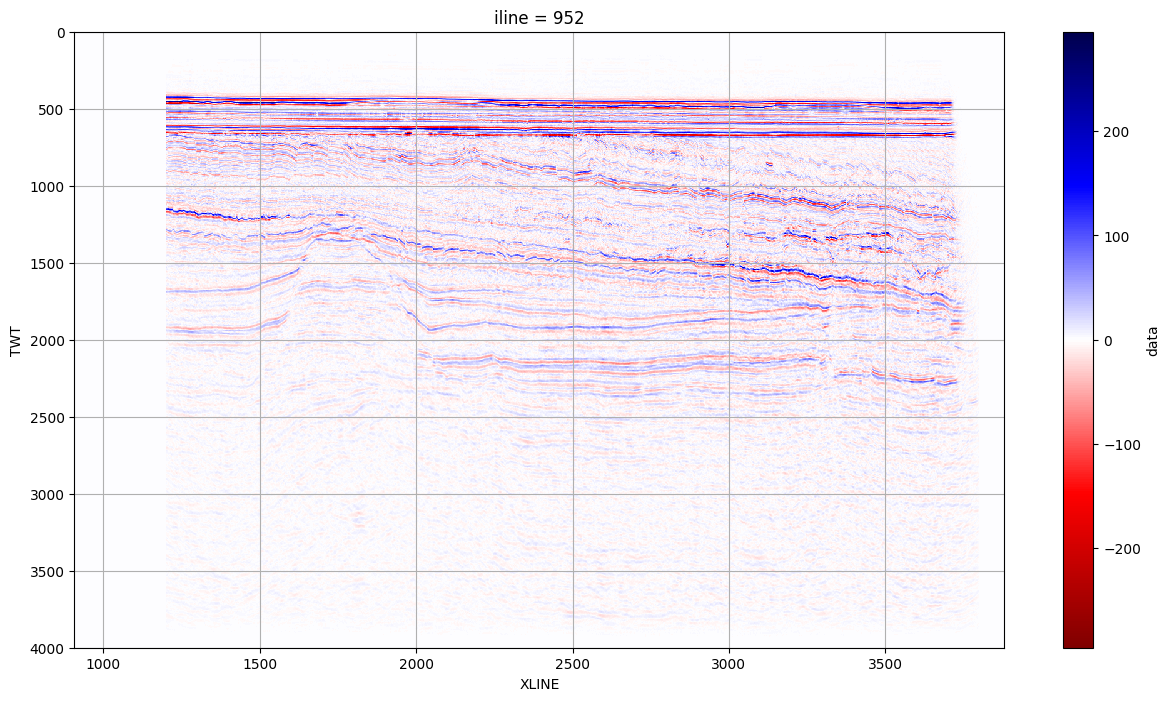

In [6]:
%matplotlib inline
fig, axes = plt.subplots(ncols = 1, figsize = (15, 8))
iline = V3D.data.iline.median().values + 1
V3D.data.transpose("twt", "iline", "xline", transpose_coords = True).sel(iline = iline).plot(yincrease = False, cmap = "seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")
plt.show()

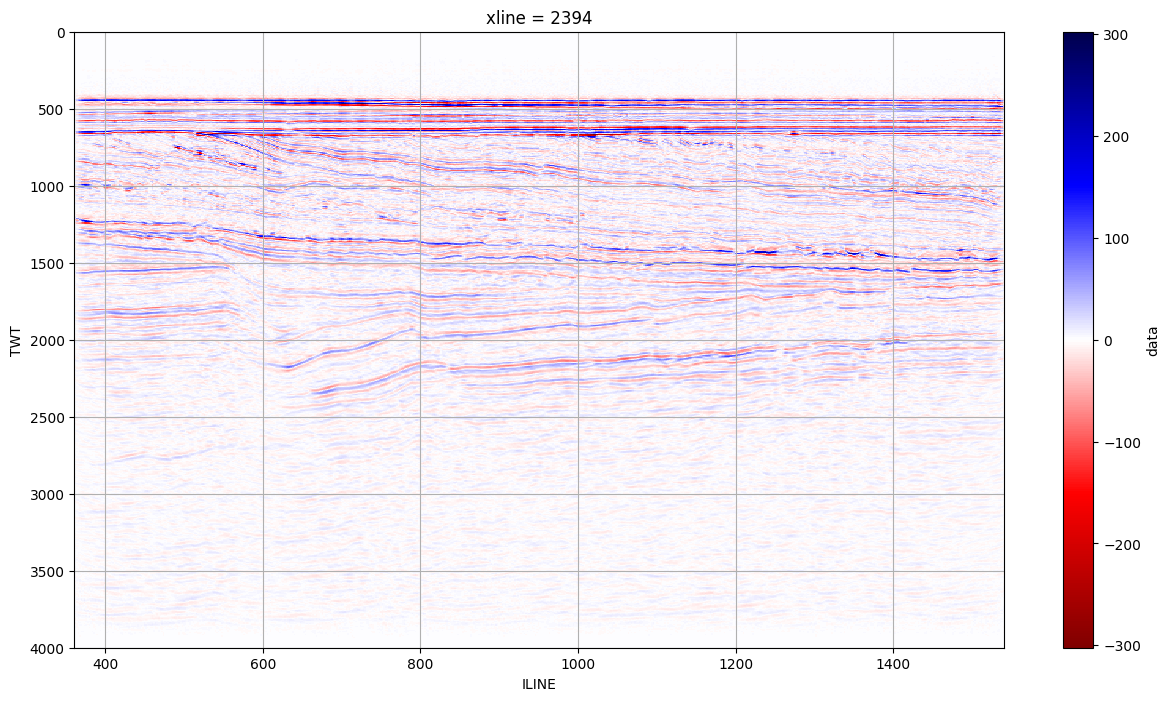

In [7]:
%matplotlib inline
fig, axes = plt.subplots(ncols = 1, figsize = (15, 8))
xline = V3D.data.xline.median().values
V3D.data.transpose("twt", "iline", "xline", transpose_coords = True).sel(xline = xline ).plot(yincrease = False, cmap = "seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("ILINE")
plt.show()

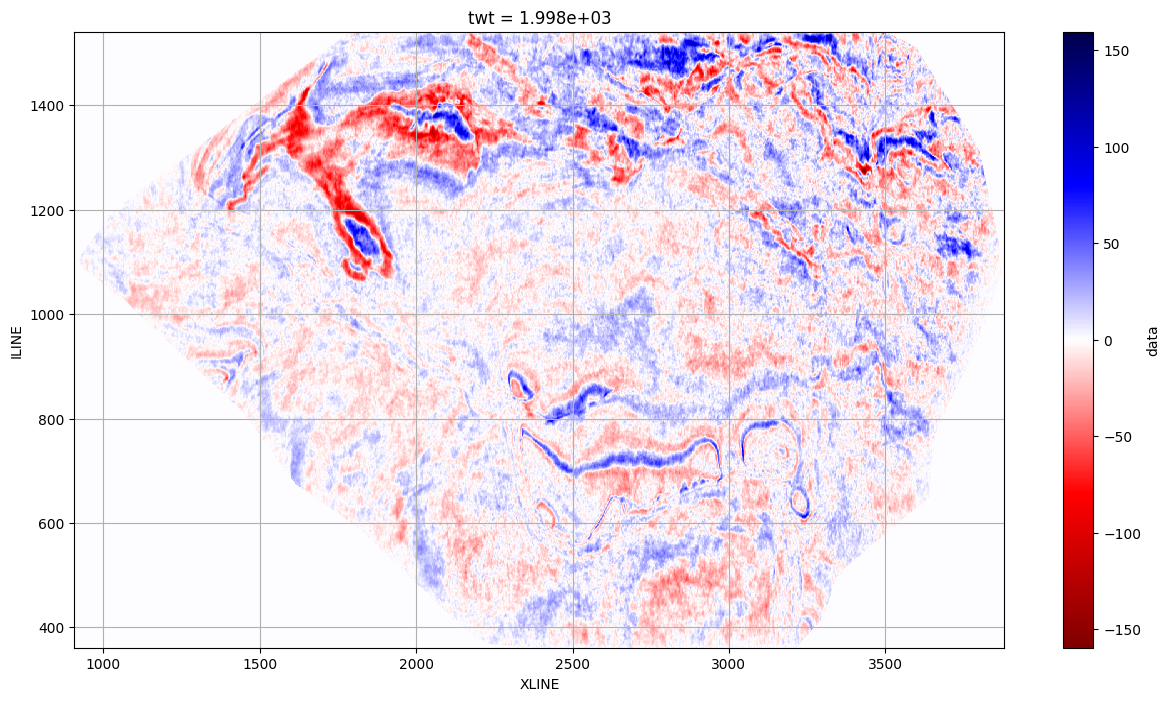

In [8]:
%matplotlib inline

twt_value = V3D.data.twt.median().values
data_at_twt = V3D.data.sel(twt = twt_value, method = 'nearest')

fig, ax1 = plt.subplots(ncols = 1, figsize = (15, 8))
data_at_twt.transpose("iline", "xline").plot(cmap = 'seismic_r')
plt.grid("gray")
plt.ylabel("ILINE")
plt.xlabel('XLINE')
plt.show()


### OGRANICZENIE CUBE SEJSMICZNEGO DO MNIEJSZYCH ROZMIARÓW

In [9]:
iline_range = (500, 1400)
xline_range = (2000, 3000)
twt_range = (1900, 2100)

In [10]:
smaller_cube = V3D.sel(iline=slice(iline_range[0], iline_range[1]), xline=slice(xline_range[0], xline_range[1]), 
                       twt=slice(twt_range[0], twt_range[1]))
smaller_cube

<xarray.Dataset> Size: 47MB
Dimensions:  (iline: 451, xline: 501, twt: 50)
Coordinates:
  * iline    (iline) uint16 902B 500 502 504 506 508 ... 1394 1396 1398 1400
  * xline    (xline) uint16 1kB 2000 2002 2004 2006 2008 ... 2994 2996 2998 3000
  * twt      (twt) float64 400B 1.902e+03 1.906e+03 ... 2.094e+03 2.098e+03
    cdp_x    (iline, xline) float32 904kB 5.55e+05 5.55e+05 ... 5.389e+05
    cdp_y    (iline, xline) float32 904kB 6.75e+06 6.75e+06 ... 6.755e+06
Data variables:
    data     (iline, xline, twt) float32 45MB -4.762 -2.381 0.0 ... 4.762 -14.28
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2019.4 Wednesday, Octobe...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         TNE01_Full
    srd:                 None
    datatype:            None
    percentiles:         [-6.62317201331616e-68, -4.41544786148683e-68, -2.20...
    coord_scalar:        -10.0

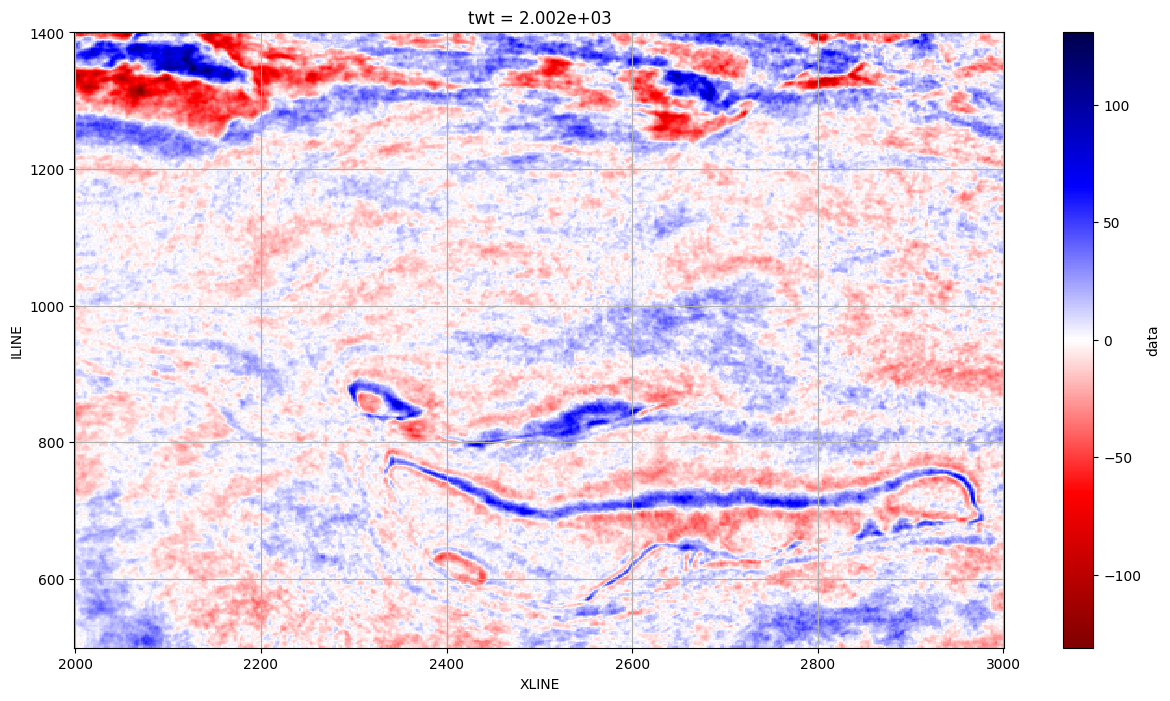

In [11]:
twt_value = smaller_cube.data.twt.median().values
data_at_twt = smaller_cube.data.sel(twt = twt_value, method = 'nearest')

fig, ax1 = plt.subplots(ncols = 1, figsize = (15, 8))
data_at_twt.transpose("iline", "xline").plot(cmap = 'seismic_r')
plt.grid("gray")
plt.ylabel("ILINE")
plt.xlabel('XLINE')
plt.show()

### KONWERSJA XARRAY DO NUMPY 

In [12]:
cube_np = smaller_cube['data'].values
cube_np

array([[[ -4.7616096,  -2.3808048,   0.       , ...,  -4.7616096,
          -7.1424146,  -2.3808048],
        [ -4.7616096,  -4.7616096,  -2.3808048, ...,  -7.1424146,
          -4.7616096,  -4.7616096],
        [ -7.1424146,  -4.7616096,  -4.7616096, ...,  -9.523219 ,
          -4.7616096,   0.       ],
        ...,
        [  4.7616096,  -2.3808048,  -4.7616096, ...,  -7.1424146,
          -2.3808048,   0.       ],
        [  7.1424146,   4.7616096,   0.       , ..., -11.904024 ,
          -2.3808048,   4.7616096],
        [  4.7616096,   0.       ,  -4.7616096, ...,  -7.1424146,
           0.       ,   2.3808048]],

       [[  0.       ,   0.       ,   0.       , ...,  -4.7616096,
          -7.1424146,  -4.7616096],
        [ -2.3808048,   0.       ,   2.3808048, ...,  -4.7616096,
          -2.3808048,  -4.7616096],
        [ -4.7616096,  -2.3808048,  -2.3808048, ...,  -9.523219 ,
          -4.7616096,   0.       ],
        ...,
        [  7.1424146,  -2.3808048,  -7.1424146, ...,  

In [13]:
print("Smaller cube numpy dimension:", cube_np.shape)

Smaller cube numpy dimension: (451, 501, 50)


# KLASTERYZACJA (K-MEANS ORAZ FUZZY C-MEANS)

K-means przypisuje każdy punkt danych do jednego klastra. Podczas działania algorytmu K-means, dla każdego punktu danych wybierany jest klaster, który ma najbliższego centroida. 

FCM uwzględnia dodatkowo stopnie przynależności do klastrów. Każdy punkt danych może być częściowo przypisany do każdego klastra, z różnymi stopniami przynależności.

W K-means centroidy są obliczane jako średnia arytmetyczna punktów przypisanych do klastra w każdej iteracji. Natomiast w FCM, centroidy są aktualizowane na podstawie średniej ważonej wszystkich punktów danych, przy uwzględnieniu stopni przynależności.

### 2D

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


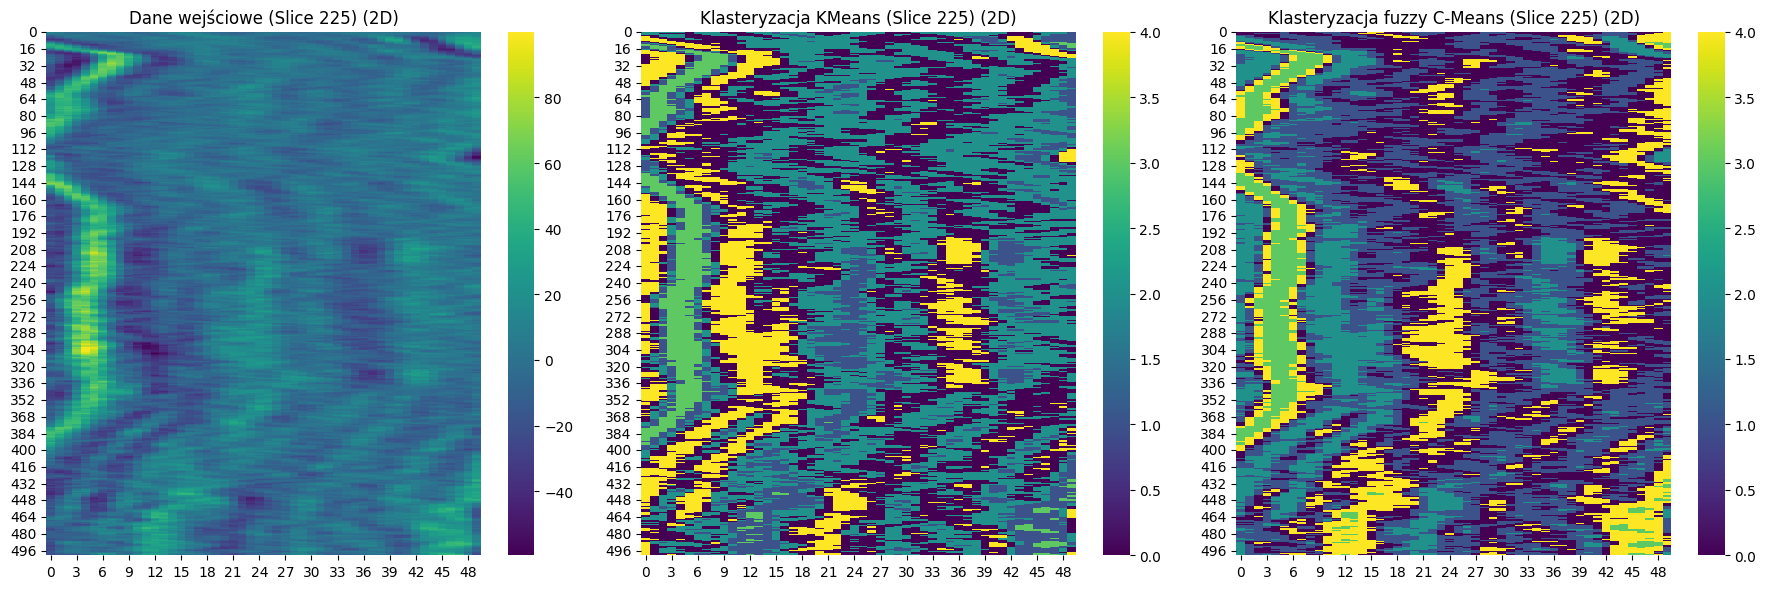

In [21]:
index = 225
data_slice = cube_np[index]
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(data_slice.reshape(-1,1))
kmeans_labels = kmeans.labels_.reshape(data_slice.shape)

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans((data_slice.reshape(-1, 1)).T, 5, 2, error = 0.005, maxiter = 1000)
fcm_labels = np.argmax(u, axis = 0).reshape(data_slice.shape)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(data_slice, cmap='viridis', cbar = True)
plt.title(f"Dane wejściowe (Slice {index}) (2D)")

plt.subplot(1, 3, 2)
sns.heatmap(kmeans_labels, cmap='viridis', cbar = True)
plt.title(f"Klasteryzacja KMeans (Slice {index}) (2D)")

plt.subplot(1, 3, 3)
sns.heatmap(fcm_labels, cmap='viridis', cbar = True)
plt.title(f"Klasteryzacja fuzzy C-Means (Slice {index}) (2D)")

plt.tight_layout()
plt.show()


# 3D

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


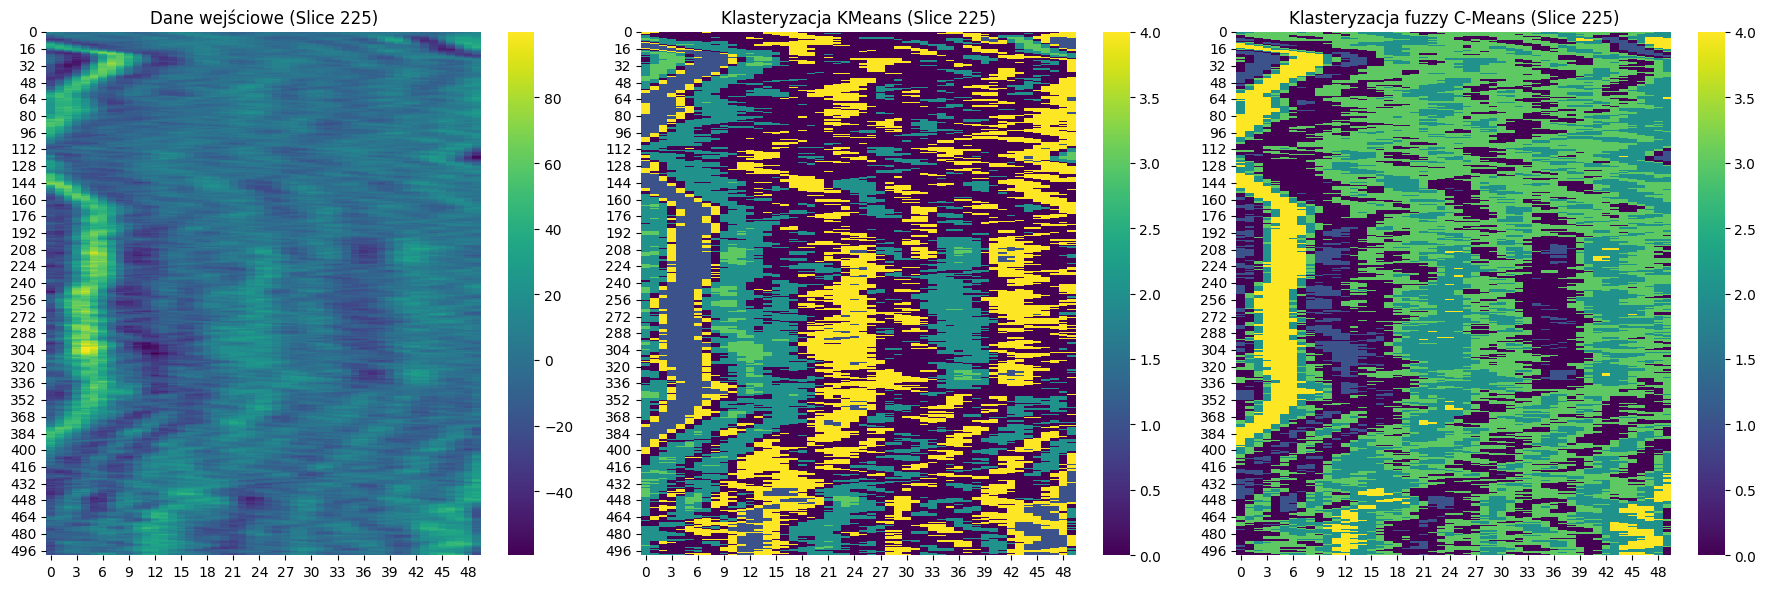

In [93]:
index = 225

data_3d = cube_np.reshape(-1, 1)
kmeans_3d = KMeans(n_clusters = 5, random_state = 0).fit(data_3d)
kmeans_labels_3d = kmeans_3d.labels_.reshape(cube_np.shape)

cntr_3d, u_3d, u0_3d, d_3d, jm_3d, p_3d, fpc_3d  = fuzz.cluster.cmeans(data_3d.T, 5, 2, error = 0.005, maxiter = 1000)
fcm_labels_3d = np.argmax(u_3d, axis = 0).reshape(cube_np.shape)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cube_np[index], cmap='viridis', cbar = True)
plt.title(f"Dane wejściowe (Slice {index})")

plt.subplot(1, 3, 2)
sns.heatmap(kmeans_labels_3d[index], cmap='viridis', cbar = True)
plt.title(f"Klasteryzacja KMeans (Slice {index})")

plt.subplot(1, 3, 3)
sns.heatmap(fcm_labels_3d[index], cmap='viridis', cbar = True)
plt.title(f"Klasteryzacja fuzzy C-Means (Slice {index})")

plt.tight_layout()
plt.show()


### PORÓWNANIE

Text(0.5, 1.0, 'Klasteryzacja fuzzy C-Means (Slice 225)(3D)')

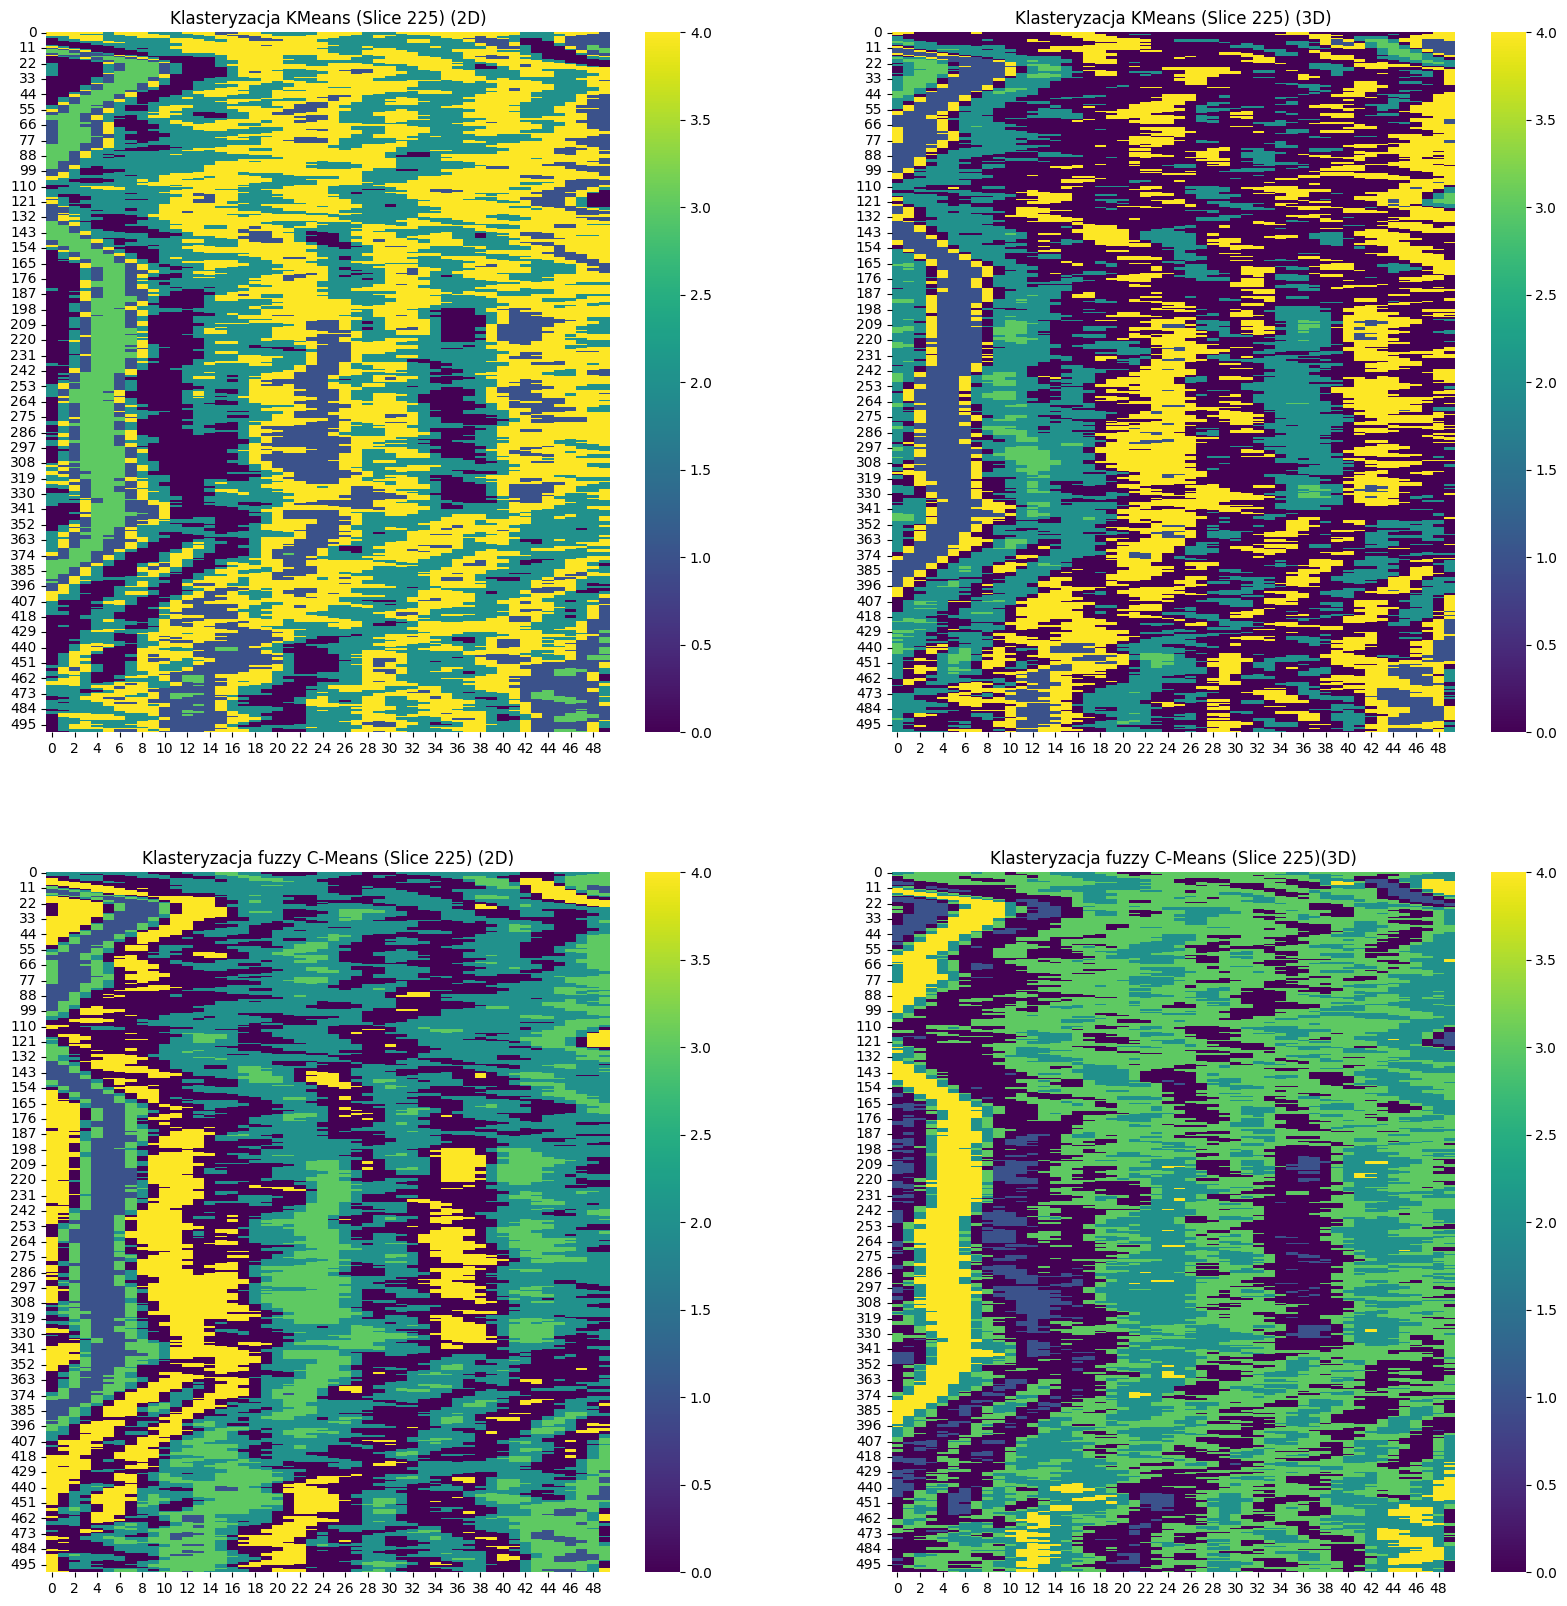

In [111]:
plt.figure(figsize = (20, 20))

plt.subplot(2, 2, 1)
sns.heatmap(kmeans_labels, cmap='viridis', cbar = True)
plt.title(f"Klasteryzacja KMeans (Slice {index}) (2D)")

plt.subplot(2, 2, 2)
sns.heatmap(kmeans_labels_3d[index], cmap='viridis', cbar = True)
plt.title(f"Klasteryzacja KMeans (Slice {index}) (3D)")

plt.subplot(2, 2, 3)
sns.heatmap(fcm_labels, cmap='viridis', cbar = True)
plt.title(f"Klasteryzacja fuzzy C-Means (Slice {index}) (2D)")

plt.subplot(2, 2, 4)
sns.heatmap(fcm_labels_3d[index], cmap='viridis', cbar = True)
plt.title(f"Klasteryzacja fuzzy C-Means (Slice {index})(3D)")


Taka klasteryzacja jest użyteczna, ponieważ zwraca uwagę na wzroce w danych, które są widoczne na danych wejściowych, jednak nie tak wyraźnie jak dla klasteryzacji. 

Obserwowane są różnice zarówno pomiędzy metodami klasteryzacji jak i dla 2D i 3D. Wydaje się, że dla FCM przejścia wydają się być bardziej płynne niż dla k-means.

### DODATKOWE ATRYBUTY

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


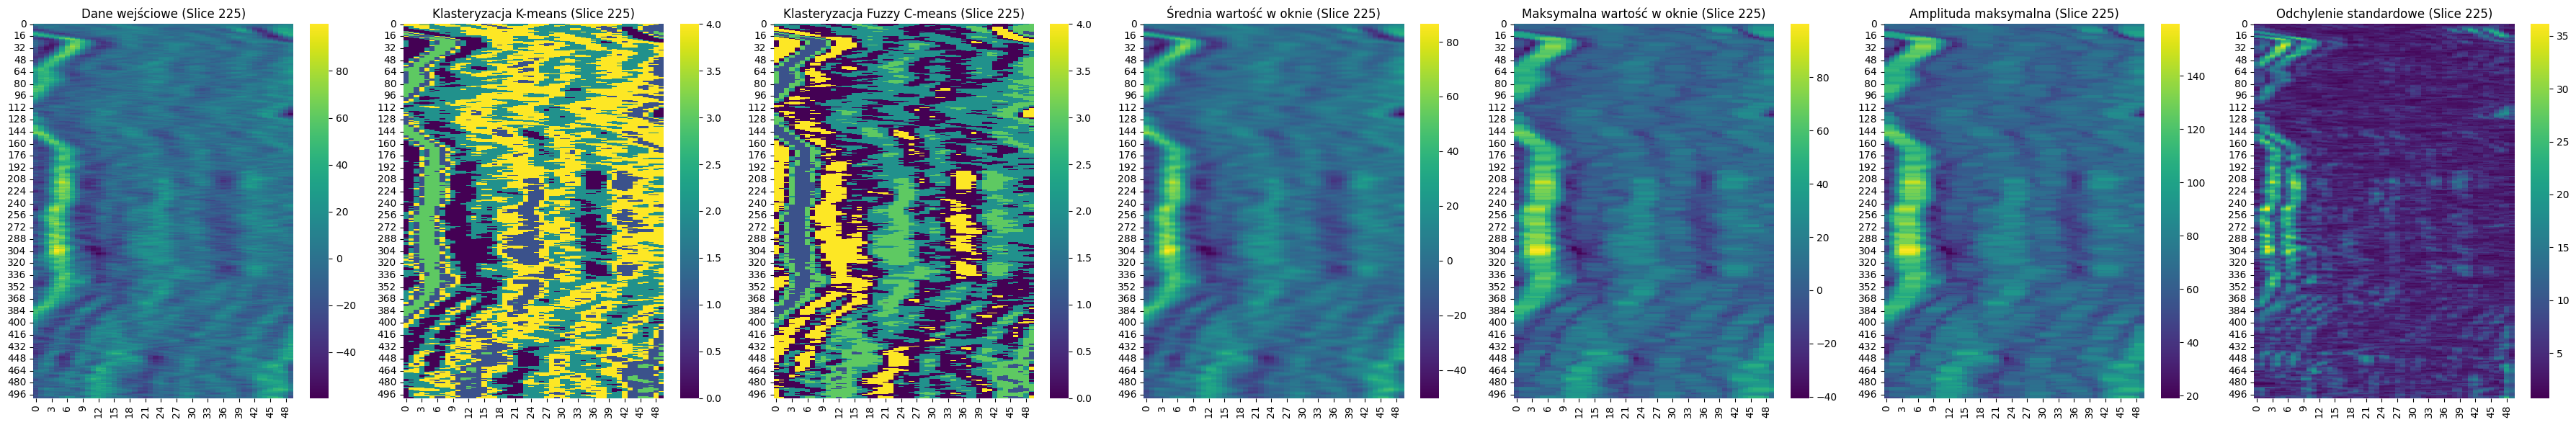

In [109]:
def calculate_attributes(data_slice, window_size=3):
    attributes = {}
    
    mean_filter = ndimage.uniform_filter(data_slice, size=window_size)
    attributes['mean'] = mean_filter
    
    max_filter = ndimage.maximum_filter(data_slice, size=window_size)
    attributes['max'] = max_filter
    
    std_filter = ndimage.generic_filter(data_slice, np.std, size=window_size)
    attributes['std'] = std_filter
    
    min_filter = ndimage.minimum_filter(data_slice, size=window_size)
    
    contrast_filter = max_filter - min_filter
    attributes['contrast'] = contrast_filter
    
    return attributes

index = 225
data_slice = cube_np[index]

attributes = calculate_attributes(data_slice)

features = np.stack([data_slice, attributes['mean']], axis=-1)
features_flat = features.reshape(-1, features.shape[-1])
kmeans = KMeans(n_clusters=5, random_state=0).fit(features_flat)
kmeans_labels = kmeans.labels_.reshape(data_slice.shape)

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(features_flat.T, 5, 2, error = 0.005, maxiter = 1000)
fcm_labels = np.argmax(u, axis=0).reshape(data_slice.shape)

plt.figure(figsize=(36, 6))

plt.subplot(1, 7, 1)
sns.heatmap(data_slice, cmap='viridis', cbar=True)
plt.title(f"Dane wejściowe (Slice {index})")

plt.subplot(1, 7, 2)
sns.heatmap(kmeans_labels, cmap='viridis', cbar=True)
plt.title(f"Klasteryzacja K-means (Slice {index})")

plt.subplot(1, 7, 3)
sns.heatmap(fcm_labels, cmap='viridis', cbar=True)
plt.title(f"Klasteryzacja Fuzzy C-means (Slice {index})")

plt.subplot(1, 7, 4)
sns.heatmap(attributes['mean'], cmap='viridis', cbar=True)
plt.title(f"Średnia wartość w oknie (Slice {index})")

plt.subplot(1, 7, 5)
sns.heatmap(attributes['max'], cmap='viridis', cbar=True)
plt.title(f"Maksymalna wartość w oknie (Slice {index})")

plt.subplot(1, 7, 6)
sns.heatmap(attributes['max'] - np.min(data_slice), cmap='viridis', cbar=True)
plt.title(f"Amplituda maksymalna (Slice {index})")

plt.subplot(1, 7, 7)
sns.heatmap(attributes['std'], cmap='viridis', cbar=True)
plt.title(f"Odchylenie standardowe (Slice {index})")

plt.tight_layout()
plt.show()


Zdecydowano się obliczyć w oknie 2D atrybuty tj. średnia, maximum, amplituda maksymalna oraz odchylenie std.

In [15]:
silhouette_avg_fcm = silhouette_score(data_slice.reshape(-1,1), fcm_labels.ravel())
print(f"Silhouette Coefficient dla Fuzzy C-Means: {silhouette_avg_fcm}")

db_score_fcm = davies_bouldin_score(data_slice.reshape(-1,1), fcm_labels.ravel())
print(f"Davies-Bouldin Index dla Fuzzy C-Means: {db_score_fcm}")

ch_score_fcm = calinski_harabasz_score(data_slice.reshape(-1,1), fcm_labels.ravel())
print(f"Calinski-Harabasz Index dla Fuzzy C-Means: {ch_score_fcm}")


Silhouette Coefficient dla Fuzzy C-Means: 0.5387446284294128
Davies-Bouldin Index dla Fuzzy C-Means: 0.528007916357008
Calinski-Harabasz Index dla Fuzzy C-Means: 59060.30223881927


In [17]:
min_clusters = 2
max_clusters = 10

silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data_slice.reshape(-1, 1))
    silhouette_avg = silhouette_score(data_slice.reshape(-1, 1), kmeans.labels_)
    davies_bouldin_avg = davies_bouldin_score(data_slice.reshape(-1, 1), kmeans.labels_)
    calinski_harabasz_avg = calinski_harabasz_score(data_slice.reshape(-1, 1), kmeans.labels_)
    
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

optimal_clusters_silhouette = min_clusters + np.argmax(silhouette_scores)
optimal_clusters_davies_bouldin = min_clusters + np.argmin(davies_bouldin_scores)
optimal_clusters_calinski_harabasz = min_clusters + np.argmax(calinski_harabasz_scores)

print(f"Optymalna liczba klastrów na podstawie indeksu Silhouette: {optimal_clusters_silhouette}")
print(f"Optymalna liczba klastrów na podstawie indeksu Daviesa-Bouldina: {optimal_clusters_davies_bouldin}")
print(f"Optymalna liczba klastrów na podstawie indeksu Calinski-Harabasza: {optimal_clusters_calinski_harabasz}")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

Optymalna liczba klastrów na podstawie indeksu Silhouette: 10
Optymalna liczba klastrów na podstawie indeksu Daviesa-Bouldina: 9
Optymalna liczba klastrów na podstawie indeksu Calinski-Harabasza: 10


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


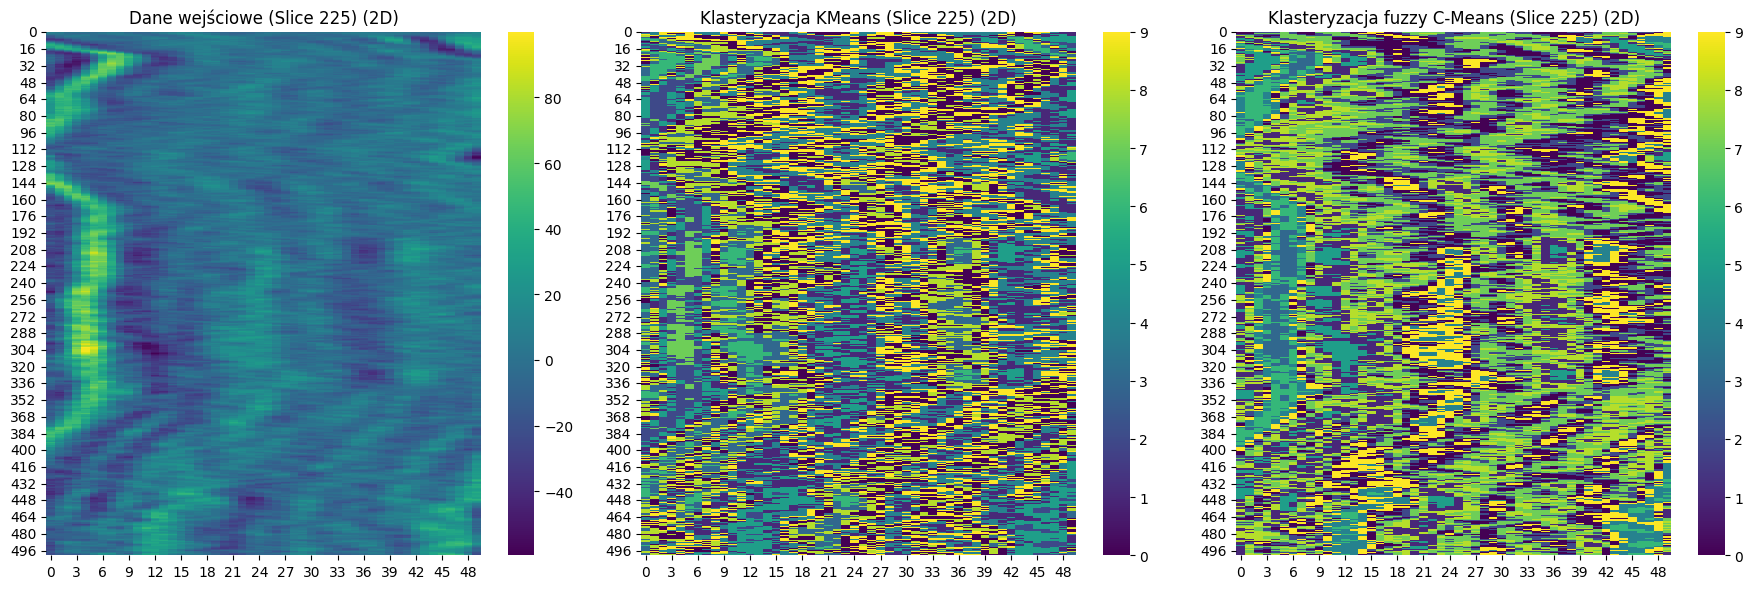

In [19]:
index = 225
data_slice = cube_np[index]
kmeans = KMeans(n_clusters = 10, random_state = 0).fit(data_slice.reshape(-1,1))
kmeans_labels = kmeans.labels_.reshape(data_slice.shape)

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans((data_slice.reshape(-1, 1)).T, 10, 2, error = 0.005, maxiter = 1000)
fcm_labels = np.argmax(u, axis = 0).reshape(data_slice.shape)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(data_slice, cmap='viridis', cbar = True)
plt.title(f"Dane wejściowe (Slice {index}) (2D)")

plt.subplot(1, 3, 2)
sns.heatmap(kmeans_labels, cmap='viridis', cbar = True)
plt.title(f"Klasteryzacja KMeans (Slice {index}) (2D)")

plt.subplot(1, 3, 3)
sns.heatmap(fcm_labels, cmap='viridis', cbar = True)
plt.title(f"Klasteryzacja fuzzy C-Means (Slice {index}) (2D)")

plt.tight_layout()
plt.show()

In [20]:
silhouette_avg_fcm = silhouette_score(data_slice.reshape(-1,1), fcm_labels.ravel())
print(f"Silhouette Coefficient dla Fuzzy C-Means: {silhouette_avg_fcm}")

db_score_fcm = davies_bouldin_score(data_slice.reshape(-1,1), fcm_labels.ravel())
print(f"Davies-Bouldin Index dla Fuzzy C-Means: {db_score_fcm}")

ch_score_fcm = calinski_harabasz_score(data_slice.reshape(-1,1), fcm_labels.ravel())
print(f"Calinski-Harabasz Index dla Fuzzy C-Means: {ch_score_fcm}")

Silhouette Coefficient dla Fuzzy C-Means: 0.5736104249954224
Davies-Bouldin Index dla Fuzzy C-Means: 0.5170490183180863
Calinski-Harabasz Index dla Fuzzy C-Means: 99581.73821477659


W artykule zostały opisane 3 metody pomagające ocenić wybór optymalnej liczby klastrów. Dla danych 2D dwie z nich wskazują, że optymalną liczbą jest 10, pozostały wskazał na 9. Metryki Silhouette oraz Calinski-Harabasz w porównaniu do początkowo wybranej liczby klastrów (5) poprawiają się, jednak wykresy są już znacznie mniej czytelne i nie pomagają w odkryciu wzorców, a przynajmniej bez wiedzy domenowej.